<center><b>EE 538 Spring 2020<br>
Analog Circuits for Sensor Systems<br>
University of Washington Electrical & Computer Engineering</b></center>


<b>Instructor: Jason Silver<br>
Assignment #1 (10 points)<br>
Due Sunday, October 11 (Submit on Canvas as a Jupyter Notebook)</b> 

*Please show your work*

<b>Problem 1: Sensor interfaces, loading, frequency response

<center><img src="img/HW1_photodiode.png" width=400></center>

Photodiodes, which are used to convert light into electric current, are typically modeled as shown above, as current sources in parallel with a "small-signal" resistance and a junction capacitance. The resistance and capacitance exhibited by the diode are in general nonlinear, such that the linear approximations shown here are valid only over a narrow range of currents/voltages. For the purposes of analysis and design, we treat them as simple passive components $r_d$ and $c_j$.

<u>*Analysis*</u>

__a)__ Determine an expression for the the transfer function $\dfrac{V_{in}}{I_d}(s)$ in terms of $r_d$, $c_j$, and $R_{in}$.

*Solution:*

The voltage $V_{in}$ is equal to the total current $i_d$ multiplied by the parallel impedance of $r_d$, $c_j$, and $R_{in}$:

$$ V_{in}(s) = \left(r_d||\dfrac{1}{sc_j}||R_{in}\right) \cdot I_d(s) $$

The transfer function is thus

$$ \dfrac{V_{in}}{I_d}(s) = \left(r_d||\dfrac{1}{sc_j}||R_{in}\right) = \dfrac{R_p}{sc_jR_p+1} $$

where

$$ R_p = \dfrac{r_dR_{in}}{r_d+R_{in}} $$

The transfer function suggests that at DC (s = 0) the voltage $V_{in}$ is just the diode current $i_d$ multiplied by the parallel combination of $r_j$ and $R_{in}$. At higher frequencies, $V_{in}$ becomes attenuated due to the reduced impedance of $c_j$.

__b)__ Let $r_d = 10k\Omega$, $c_j = 1pF$, and $R_{in} = 1k\Omega$. Use *Python* to plot the magnitude and phase of the transfer function $\dfrac{V_{in}}{I_d}(s)$. What is the 3db-bandwidth ($\omega_0 = 1/\tau$) of the magnitude response?  

*Solution:*

Text(0.5, 0, 'Frequency [Hz]')

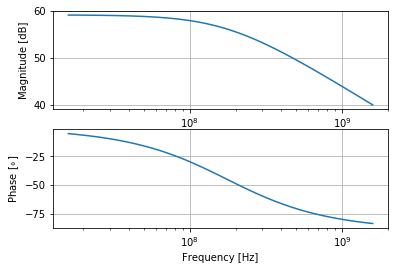

In [6]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

r_d = 10e3
c_j = 1e-12
R_in = 1e3
R_p = r_d*R_in/(r_d+R_in)

tf = signal.TransferFunction([R_p],[c_j*R_p, 1])
w, mag, phase = tf.bode() 
f = w/np.pi/2

fig, ax = plt.subplots(2)
ax[0].semilogx(f, mag)
ax[0].grid()
ax[0].set_ylabel('Magnitude [dB]')

ax[1].semilogx(f, phase)
ax[1].grid()
ax[1].set_ylabel('Phase [$\circ$]')
ax[1].set_xlabel('Frequency [Hz]')


To determine the 3dB bandwidth, we find the frequency at which the transfer function magnitude is reduced by $\frac{1}{\sqrt{2}}$. For a first-order system, this is just $\omega_0$:

In [7]:
tau = R_p*c_j
w_0 = 1/tau
f_3dB = w_0/2/np.pi
print('The 3dB frequency is', 1e-6*f_3dB, 'MHz')

The 3dB frequency is 175.07043740108486 MHz


<u>*Design*</u>

__c)__ For the values of $r_d$ and $R_{in}$ in *Part b*, by what percentage is the diode current attenuated due to loading at DC ($f = 0$)? That is, what percentage of $i_d$ is "lost" due to the finite output resistance ($r_d$) of the diode? 

Calculate a new value of $R_{in}$ that results in only 0.1% attenuation of the diode current at DC.

*Note: For DC calculations you can ignore the presence of $c_j$, because its impedance magnitude $\left|\frac{1}{j\omega c_j}\right|$ is infinite.*

*Solution:*

At DC, the current divider expression becomes greatly simplified due to the lack of any contribution from the capacitor $c_j$:

$$ I_{in}(s=0) = \dfrac{r_d}{R_{in}+r_d}\cdot i_d $$

The attenuation of the current is determined by the ratio of $r_d$ to the sum of $r_d$ and $R_{in}$:

In [8]:
i_in_DC = r_d/(R_in + r_d)
print('i_in = ', i_in_DC, 'x i_d')

i_in =  0.9090909090909091 x i_d


which results in an attenuation of about __9%__.

For only 0.1% attenuation, we want 99.9% of $i_d$ to flow through $R_{in}$:

$$\dfrac{r_d}{r_d+R_{in}} = 0.999 $$

In [9]:
R_in_new = 0.001*r_d/0.999
print('The new value of Rin is', R_in_new, 'Ohms')

The new value of Rin is 10.01001001001001 Ohms


__d)__ Using the value of $R_{in}$ calculated in *Part c*, use *Python* to plot the magnitude and phase of the transfer function. Build the circuit in SPICE and run an AC simulation. Ensure that the magnitude/phase responses agree with those from your analytical (*Python*) model.

*Solution:*

Text(0.5, 0, 'Frequency [Hz]')

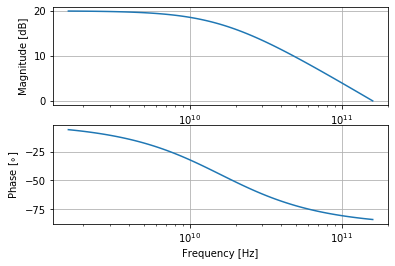

In [10]:
r_d = 10e3
c_j = 1e-12
R_in = 10
R_p = r_d*R_in/(r_d+R_in)

tf = signal.TransferFunction([R_p],[c_j*R_p, 1])
w, mag, phase = tf.bode() 
f = w/np.pi/2

fig, ax = plt.subplots(2)
ax[0].semilogx(f, mag)
ax[0].grid()
ax[0].set_ylabel('Magnitude [dB]')

ax[1].semilogx(f, phase)
ax[1].grid()
ax[1].set_ylabel('Phase [$\circ$]')
ax[1].set_xlabel('Frequency [Hz]')


Build the circuit in Spice and run ac simulation. Simulation schematic and set-up in LTSpice:

<center><img src="img/HW1_sch.png" width=1000></center>

<font color='black'>Simulation results including magnitude/phase response in LTSpice:</font>

<center><img src="img/HW1_ac.png" width=1000></center>

Import data from LTSpice and plot it in Python:

In [11]:
import pandas as pd
import numpy as np
V_out = pd.read_csv('HW1.csv')

Text(0.5, 0, 'Frequency [Hz]')

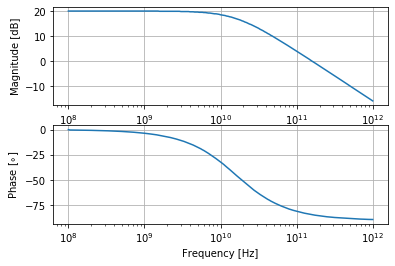

In [12]:

fig, ax = plt.subplots(2)
ax[0].semilogx(V_out['freq'], V_out['mag'])
ax[0].grid()
ax[0].set_ylabel('Magnitude [dB]')

ax[1].semilogx(V_out['freq'], V_out['phase'])
ax[1].grid()
ax[1].set_ylabel('Phase [$\circ$]')
ax[1].set_xlabel('Frequency [Hz]')


Simulation results in LTSpice matches well with the analytical model in Python in terms of low frequency gain, bandwidth, phase.

<br><br>*Suggestion: Try using Latex for displaying mathematical expressions and equations. One nice feature of Jupyter Notebooks is its ability to incorporate both code and "markup," used for formatting text, into the same document. Some examples of Latex are given above in the problem descriptions. You can press Return or double click a cell to see the markup, then use Shift-Return to view the formatted version. Here are a few more examples:*

\begin{equation}
j = \sqrt{-1} \\
V = IR \\
I_C = C \cdot \frac{dV}{dt} 
\end{equation}